In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: str
    result: str


In [5]:
def first_node(state: AgentState) -> AgentState:
    """Personalized greeting node."""
    state["result"] = f"Hello {state['name']}, you are welcome to LangGraph!"
    return state
def second_node(state: AgentState) -> AgentState:
    """Age acknowledgment node."""
    state["result"] += f" You are {state['age']} years old"
    return state
def third_node(state: AgentState) -> AgentState:
    """Skills acknowledgment node."""
    state["result"] += f" and you have skills in: {state['skills']}."
    return state

In [6]:
graph = StateGraph(AgentState)

graph.add_node(first_node)
graph.add_node(second_node)
graph.add_node(third_node)


graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")

app = graph.compile()

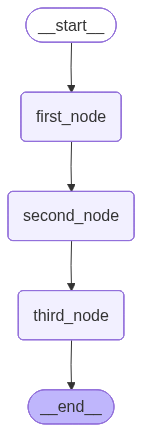

In [9]:
from IPython.display import display, Markdown, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
combo = app.invoke({"name": "Abdulbasit", "age": "30", "skills": "Python, Data Science, ML, AI"})

In [8]:
combo["result"]

'Hello Abdulbasit, you are welcome to LangGraph! You are 30 years old and you have skills in: Python, Data Science, ML, AI.'